In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.shape

(29451, 12)

In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [7]:
df_cat=df.select_dtypes(object)
df_cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"


In [8]:
df_num=df.select_dtypes('float64','int64')
df_num.head()

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,55.0
1,1275.000000,12.274538,76.644605,51.0
2,933.159722,12.778033,77.632191,43.0
3,929.921143,28.642300,77.344500,62.5
4,999.009247,22.592200,88.484911,60.5


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    print(col,':',le.classes_)

POSTED_BY : ['Builder' 'Dealer' 'Owner']
BHK_OR_RK : ['BHK' 'RK']
ADDRESS : [', panvel,Mumbai' ',Manoramaganj,Indore' '100 Feet Road,Anand' ...
 'walkeshwari nagari,Jamnagar' 'west mambalam,Chennai'
 'yelahanka/Jakkur,Bangalore']


C:\Users\jayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS
0,2,0,2844
1,1,0,6576
2,2,0,2256
3,2,0,5095
4,1,0,3830


In [12]:
df_cat['BHK_OR_RK'].unique()

array([0, 1], dtype=int64)

In [13]:
new_df=df[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','LONGITUDE','LATITUDE']]
new_df.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,2,1300.236407,1,1,12.969910,77.597960
1,0,0,2,1275.000000,1,1,12.274538,76.644605


In [14]:
new_df1=df[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','LONGITUDE','LATITUDE','TARGET(PRICE_IN_LACS)']]
new_df1.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0


In [15]:
hp=pd.concat([new_df,df_cat],axis=1)
hp.head(2)


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY,BHK_OR_RK,ADDRESS
0,0,0,2,1300.236407,1,1,12.969910,77.597960,2,0,2844
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,6576


In [16]:
hp1=pd.concat([df_cat,new_df1],axis=1)
hp1.head(2)

,POSTED_BY,BHK_OR_RK,ADDRESS,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,2844,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,6576,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0


In [17]:
hp1.describe()

,POSTED_BY,BHK_OR_RK,ADDRESS,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,1.336695,0.000815,3544.585175,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.515345,0.028536,1988.800775,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,1.000000,0.000000,1906.000000,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,1.000000,0.000000,3488.000000,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,2.000000,0.000000,5226.000000,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,2.000000,1.000000,6898.000000,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [18]:
hp1.corr()

,POSTED_BY,BHK_OR_RK,ADDRESS,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
POSTED_BY,1.000000,-0.027895,-0.040621,-0.263473,-0.285316,-0.072466,0.005415,0.263473,0.332280,-0.049164,0.025425,-0.093328
BHK_OR_RK,-0.027895,1.000000,-0.011355,0.020719,0.006056,-0.045231,-0.000292,-0.020719,-0.029346,0.009095,0.000303,-0.004429
ADDRESS,-0.040621,-0.011355,1.000000,-0.013684,0.073604,0.042386,0.000169,0.013684,0.025715,0.181983,-0.027280,-0.016178
UNDER_CONSTRUCTION,-0.263473,0.020719,-0.013684,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,-0.285316,0.006056,0.073604,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.072466,-0.045231,0.042386,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,0.005415,-0.000292,0.000169,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,0.263473,-0.020719,0.013684,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,0.332280,-0.029346,0.025715,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,-0.049164,0.009095,0.181983,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112


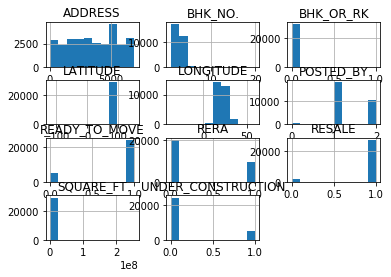

In [19]:
hp.hist()
plt.show()

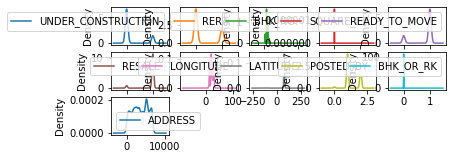

In [20]:
hp.plot(kind='density',subplots=True,layout=(5,5),sharex=False)
plt.show()

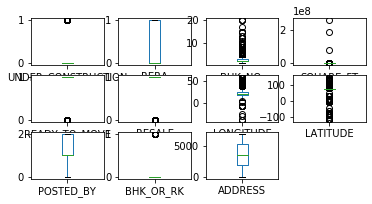

In [21]:
hp.plot(kind='box',subplots=True,layout=(4,4),sharex=False)
plt.show()

In [22]:
y=df['TARGET(PRICE_IN_LACS)']

In [23]:
y.head(2)

0    55.0
1    51.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [32]:
x=hp

In [33]:
x.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY,BHK_OR_RK,ADDRESS
0,0,0,2,1300.236407,1,1,12.969910,77.597960,2,0,2844
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,6576


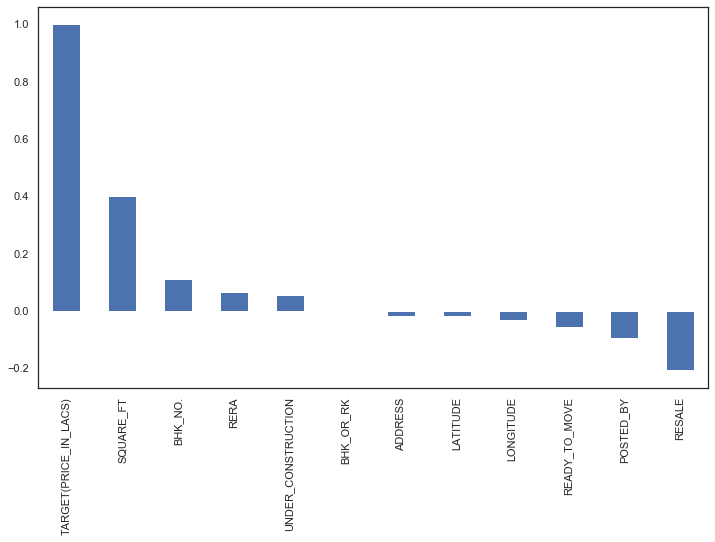

In [34]:
import seaborn as sns
import matplotlib.ticker as mtick

sns.set(style='white')

plt.figure(figsize=(12,7))
hp1.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False).plot(kind='bar')

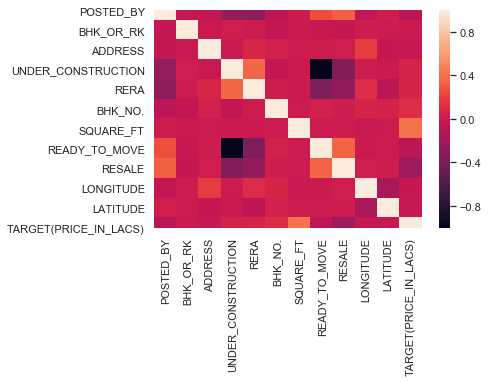

In [35]:
sns.heatmap(hp1.corr())
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred=lr.predict(x_test)

In [41]:
mean_squared_error(y_test,y_pred)

357538.7500809945

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [42]:
r2_score(y_test,y_pred)

0.17087553121797971

In [ ]:
import seaborn as sns

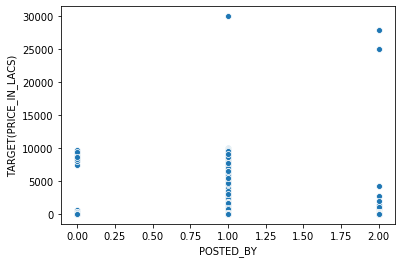

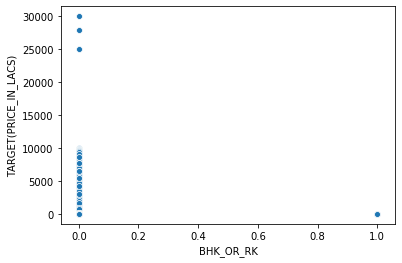

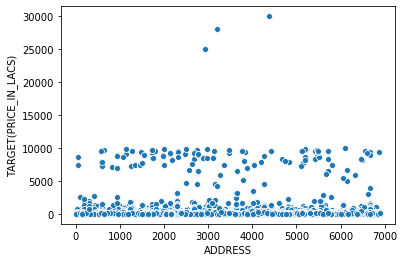

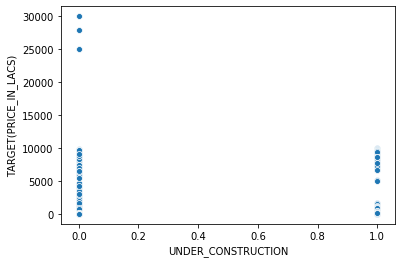

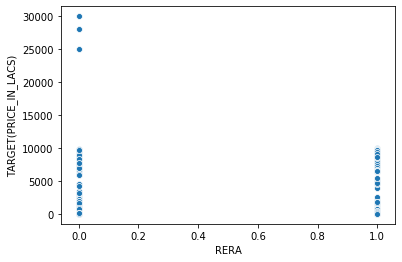

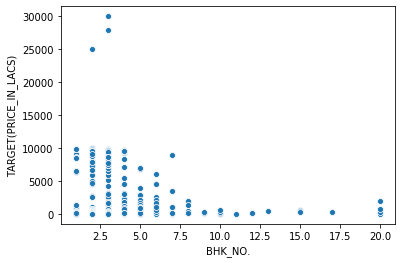

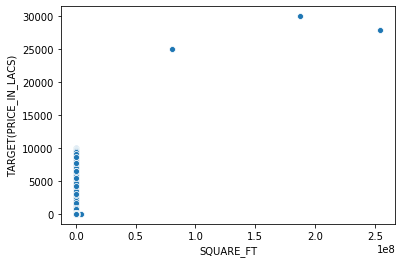

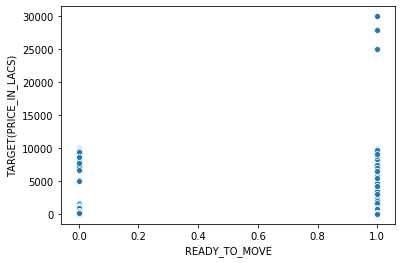

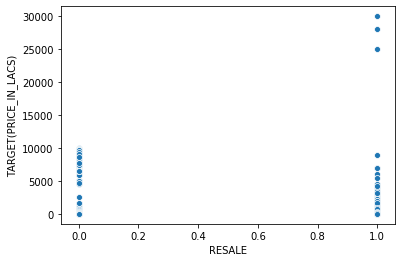

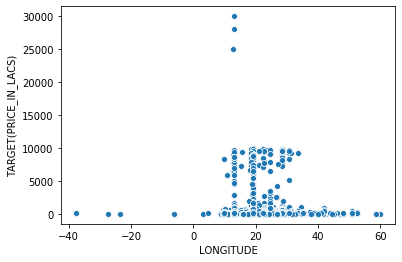

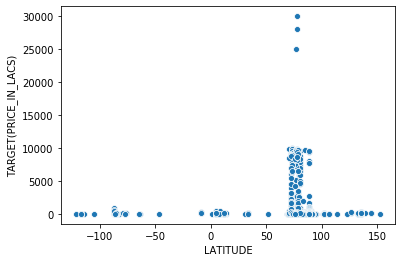

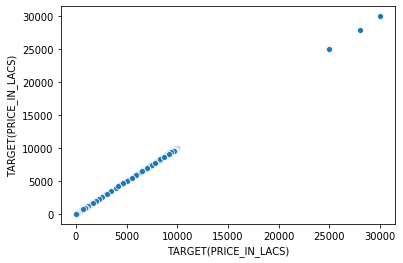

In [31]:
for i in hp1:
    sns.scatterplot(data=hp1,x=i,y='TARGET(PRICE_IN_LACS)')
    plt.show()

In [48]:
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.7859786659848087

In [51]:
y_pred = dt.predict(x_test) 
print("Predicted price: % d\n", y_pred)  


Predicted price: % d
 [150.  75.  90. ...  75.  36.  43.]


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [54]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=100)

In [55]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [56]:
clf.score(x_test,y_test)

0.8045724616329694

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [58]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=dt,random_state=0)
ada_clf.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

In [60]:
ada_score = ada_clf.score(x_test,y_test)
print("Ada boost Score: ",ada_score)

Ada boost Score:  0.7896294033720042


In [64]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [66]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [68]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[12:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 500.182114
